# Part A: Data Exploration and Baseline Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Analyze Dataset

Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. 

In [2]:
dataset = pd.read_csv("datasets/creditcard.csv")

In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Looks like the dataset is centered. It is also known from the dataset description that PCA has been applied to the dataset. This means the first feature `V1` is the first principal component with maximum explained variance

In [5]:
dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This clearly shows data imbalance.

##  Analyze Class Distribution

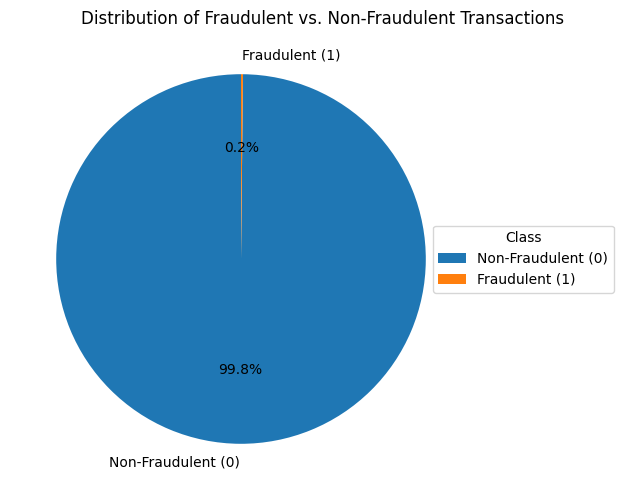

In [6]:
class_counts = dataset['Class'].value_counts()
labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions', loc="right", pad=1, x=1.2)
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Class')

In [7]:
print("Class Distribution:")
print(class_counts)
print("*"*50)
imbalance_ratio = class_counts[0] / class_counts[1] if 1 in class_counts else 'Infinite (no fraud cases)'
print(f"Degree of Imbalance: {imbalance_ratio:.2f}:1 (Non-Fraud:Fraud)")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
**************************************************
Degree of Imbalance: 577.88:1 (Non-Fraud:Fraud)


The degree of imbalance `577.88:1 (Non-Fraud:Fraud)` is very high

In [ ]:
import plotly.graph_objects as go

# Assuming 'dataset' is your pandas DataFrame with the 'Class' column (0 for non-fraud, 1 for fraud)
class_counts = dataset['Class'].value_counts()
total_transactions = len(dataset)

labels = ["All Transactions", "Non-Fraud", "Fraud"]
source = [0, 0]  # All transactions split into non-fraud and fraud
target = [1, 2]  # Non-fraud and fraud nodes
value = [class_counts[0], class_counts[1]]  # Actual counts for non-fraud and fraud

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=5,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Transactions to Fraudulent vs. Non-Fraudulent Transactions",
    font_size=11,
    width=500,
    height=400
)
fig.show()

These analyses show clearly how imbalanced the dataset is.

##  Baseline Model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
X = dataset.drop("Class", axis=1)
y = dataset.pop("Class")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True,
                                                    stratify=y)

In [11]:
model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

The metrics of the baseline model for predicting Fraudulent transactions are: 

Accuracy :  0.9991397773954567
Precision :  0.8266666666666667
Recall :  0.6326530612244898
F1 Score :  0.7167630057803468


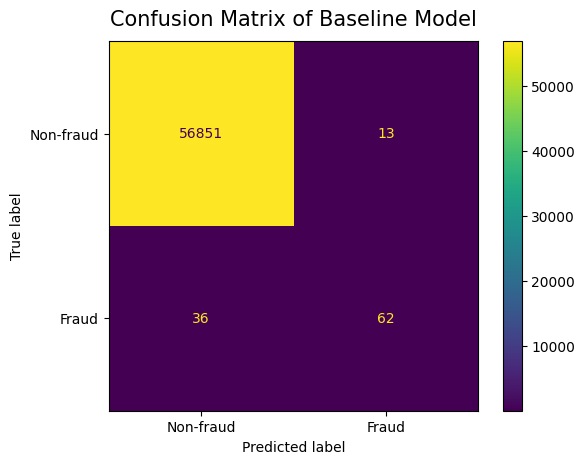

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of Baseline Model",  fontsize=15, y=1.02)

precision_base_model = precision_score(y_test, y_pred)
recall_base_model = recall_score(y_test, y_pred)
accuracy_base_model = accuracy_score(y_test, y_pred)
f1_base_model = f1_score(y_test, y_pred)

print("The metrics of the baseline model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_base_model)
print("Precision : ", precision_base_model)
print("Recall : ", recall_base_model)
print("F1 Score : ", f1_base_model)

This shows very clearly that the model is very effective in terms of accuracy and has fairly decent precision. But looking at recall, the model is not effective at all. Here are a few specific observations that signify this.

1. Accuracy close to 1 signifies that accuracy is highly influenced by the number of datapoints
    - This wrongly indicates that the model is doing great
2. Precision of ~0.83 shows that out of all the datapoints predicted to be fraud, only ~83% of them were actually fraud. 
    - Which again is not bad but it is not representative of the truth
3. Recall of ~0.63 shows that out of all the fraudulent transactions, only ~63% of them were correctly predicted as fraud by the model.
    - This is the most relevant metric of all as it clearly shows the real performance of the model.
    - It is important because we care far more about finding fraudulent transactions than we do about non-fraudulent ones
4. F1 score is a function of precision and recall.
    - It also isn't very indicative of the model performance but definitely does a better job than accuracy.

This is also clear from the confusion matrix. 

# Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

## Theoretical Foundation

When tackling class imbalance in problems like credit card fraud detection, synthetic sampling often becomes essential to improve supervised models. Two common approaches are SMOTE (Synthetic Minority Oversampling Technique) and Gaussian Mixture Model (GMM)–based sampling. While SMOTE is widely used for its simplicity, GMM sampling offers theoretical advantages that make it more suitable when the minority class has multiple sub-groups or complex shapes in feature space, such as those revealed through PCA.

**Key Differences:**

  - **Local vs. Global:** SMOTE generates synthetic points by interpolating between a sample and its nearest neighbors, effectively assuming linear boundaries within small regions. GMM, by contrast, learns a global density using multiple Gaussian components and samples from this learned distribution, allowing it to capture structure across the entire space.

  - **Distribution Assumptions:** SMOTE assumes a locally convex neighborhood without modeling density, which can place samples in low-probability regions. GMM explicitly estimates a multimodal density with expectation–maximization, assigning soft memberships to clusters and sampling proportionally to their weights.

  - **Noise and Boundary Handling:** SMOTE may produce unrealistic samples if neighbors cross class boundaries. GMM accounts for covariance within each component, reducing such errors by generating samples consistent with the likelihood of the data.

**Why GMM Is Theoretically More Robust:**

  - **Multimodal Capability:** GMM naturally decomposes the minority class into clusters, enabling it to capture distinct fraud subtypes (e.g., card skimming vs. laundering) rather than treating them as one uniform group. SMOTE ignores this structure, interpolating blindly between points from different subgroups which is obviously less effective for downstream tasks.

  - **Adaptability in Feature Space:** With full covariance matrices, GMM components adapt to irregular, elongated, or rotated shapes in high-dimensional PCA-transformed data. SMOTE’s neighbor-based approach struggles here, often generating implausible samples.

  - **Density Awareness:** Because GMM samples according to the learned posterior distribution, it preserves the underlying density and avoids oversampling sparse areas. This makes downstream classifiers, such as logistic regression, more robust.

  - **More Robust Foundations:** GMM is grounded in maximum-likelihood estimation and minimizes KL-divergence under Gaussian assumptions, giving it a principled advantage over SMOTE’s heuristic interpolation; particularly when minority data is heterogeneous and multimodal.

## GMM Implementation

In [13]:
from sklearn.mixture import GaussianMixture

In [14]:
minority_mask = y_train == 1
X_minority = X_train[minority_mask].copy()
y_minority = y_train[minority_mask].copy()

# Scale the minority class data and determine optimal k with Elbow Method
scaler_gmm = StandardScaler()
X_minority_scaled = scaler_gmm.fit_transform(X_minority)

aic = []
bic = []
n_comp_range = range(1, 25)
for n_comp in n_comp_range:
    gmm = GaussianMixture(n_components=n_comp, random_state=24)
    gmm.fit(X_minority_scaled)
    aic.append(gmm.aic(X_minority_scaled))
    bic.append(gmm.bic(X_minority_scaled))

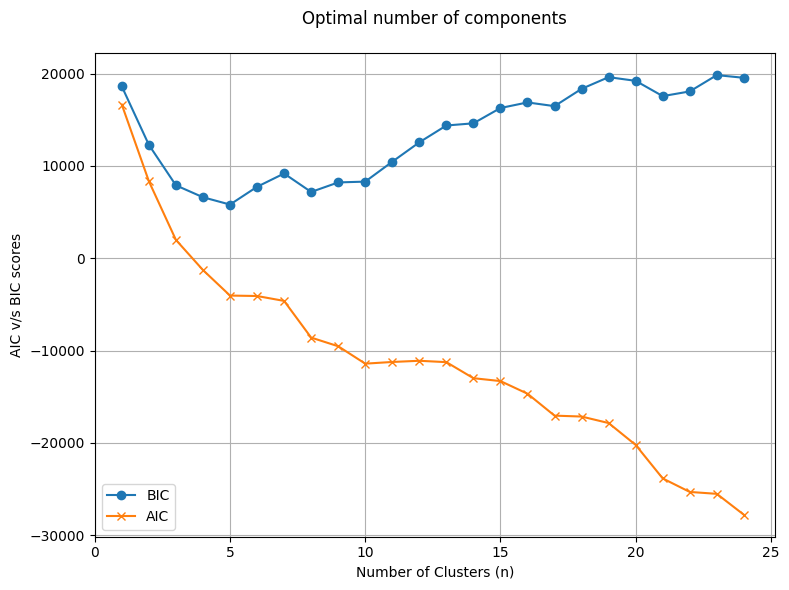

In [15]:
plt.figure(figsize=(8, 6))
bic_line = plt.plot(n_comp_range, bic, marker='o', label="BIC")
aic_line = plt.plot(n_comp_range, aic, marker='x', label="AIC")
plt.title('Optimal number of components\n')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('AIC v/s BIC scores')
plt.legend()
plt.xlim(0)
plt.grid(True)
plt.tight_layout()

This is very interesting. AIC and BIC are like "energy costs" in statistical modeling: they measure a model's "total energy" as goodness-of-fit (how well it explains the data) via log-likelihood minus a penalty for complexity. Since extra parameters risking overfitting, this penalty is important. Lower "total energy" means a simpler, more predictive model. AIC assumes future data would be like training data and offers a milder penalty which is good for small samples. On the other hand, BIC assumes the true model is in your set which induces a harsher penalty and favors sparsity in large data. In GMM, these measures are used to prevent "imaginary clusters" by quantifying whether added components truly reduce uncertainty or just add noise. The negative AIC signals strong fits, but BIC's explosion warns against overcomplicating the fraud sub-groups.

Looking at both AIC and BIC, graph strongly suggests keeping optimal_n between 5 and 7. Since this is where BIC is closest to 0 and AIC also seems to stabilize before both diverge.

## Synthetic Data Generation

In [53]:
# Optimal GMM
optimal_n1 = 6
gmm_optimal1 = GaussianMixture(n_components=optimal_n1, random_state=24)
gmm_optimal1.fit(X_minority_scaled)

GaussianMixture(n_components=6, random_state=24)

In [54]:
# Generate synthetic samples
majority_count = (y_train == 0).sum()
n_synthetic = majority_count - len(X_minority)

# Sample from GMM
synthetic_samples, synthetic_labels = gmm_optimal1.sample(n_synthetic)

# Since all synthetic datapoints are minority class (i.e. 1)
synthetic_labels = np.ones(n_synthetic, dtype=np.int8)

# Inverse transform to original scale
synthetic_samples = scaler_gmm.inverse_transform(synthetic_samples)

# Combine with original training data
X_gmm_balanced = np.vstack([X_train, synthetic_samples])
y_gmm_balanced = np.hstack([y_train, synthetic_labels])

print(f"Original train shape: {X_train.shape} \nGMM-balanced shape: {X_gmm_balanced.shape}\n")
print("GMM-balanced class distribution:")
pd.Series(y_gmm_balanced, name="GMM-balanced data").value_counts()

Original train shape: (227845, 30) 
GMM-balanced shape: (454902, 30)

GMM-balanced class distribution:


GMM-balanced data
0    227451
1    227451
Name: count, dtype: int64

## Rebalancing with CBU
- Use clustering-based Undersampling on the majority dataset to bring it down to a suitable population.
- Use GMM-based synthetic sampling on the minority dataset to match the majority population and hence create a balanced dataset.

In [18]:
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [109]:
# Optimal GMM
optimal_n2 = 5
gmm_optimal2 = GaussianMixture(n_components=optimal_n2, random_state=24)
gmm_optimal2.fit(X_minority_scaled)

GaussianMixture(n_components=5, random_state=24)

In [110]:
majority_mask = y_train == 0
X_majority = X_train[majority_mask].copy()
y_majority = y_train[majority_mask].copy()

scaler_gmm_cbu = StandardScaler()
X_majority_scaled = scaler_gmm_cbu.fit_transform(X_majority)

optimal_k_cbu = 10       # This value comes from Assignment 3
kmeans = KMeans(n_clusters=optimal_k_cbu, random_state=24)
kmeans_labels = kmeans.fit_predict(X_majority_scaled)

X_majority_df = pd.DataFrame(X_majority_scaled, columns=[f'feature_{i}' for i in range(X_majority_scaled.shape[1])])
X_majority_df['cluster'] = kmeans_labels
X_majority_df['target'] = y_majority.values

# Undersample proportionally to preserve original distribution
reduction_factor = 22        # Increase to sample lesser points from each KMeans cluster
sample_size_per_cluster = len(X_majority) // (optimal_k_cbu * reduction_factor)

X_undersampled_list = []
y_undersampled_list = []
for cluster in range(optimal_k_cbu):
    cluster_mask = X_majority_df['cluster'] == cluster
    X_cluster = X_majority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_majority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Undersample proportionally
        if len(X_cluster) > sample_size_per_cluster:
            X_cluster_undersampled, y_cluster_undersampled = resample(X_cluster, y_cluster, 
                                                                     n_samples=sample_size_per_cluster, 
                                                                     replace=False, random_state=24)
        else:
            X_cluster_undersampled = X_cluster
            y_cluster_undersampled = y_cluster
        X_undersampled_list.append(X_cluster_undersampled)
        y_undersampled_list.append(y_cluster_undersampled)

# Combining undersampled majority data with all minority data
X_undersampled = np.vstack(X_undersampled_list)
y_undersampled = np.hstack(y_undersampled_list)

X_cbu = np.vstack([X_undersampled, X_minority])
y_cbu = np.hstack([y_undersampled, y_train[y_train == 1].values])

minority_mult_factor = 12
target_majority_size = len(X_minority) * minority_mult_factor
# Applying GMM to minority to match the undersampled majority size
n_synthetic_cbu = target_majority_size - len(X_minority)
synthetic_cbu, _ = gmm_optimal2.sample(n_synthetic_cbu)
synthetic_cbu = scaler_gmm_cbu.inverse_transform(synthetic_cbu)
synthetic_cbu_labels = np.ones(n_synthetic_cbu)

# Combine undersampled majority (which includes minority class) and synthetic minority
X_gmm_cbu_balanced = np.vstack([X_cbu, synthetic_cbu])
y_gmm_cbu_balanced = np.hstack([y_cbu, synthetic_cbu_labels])

print(f"GMM-CBU balanced shape: {X_gmm_cbu_balanced.shape}")
print("GMM-CBU class distribution:")
pd.Series(y_gmm_cbu_balanced, name='GMM-CBU (K-Means) undersampled data').value_counts()

GMM-CBU balanced shape: (15058, 30)
GMM-CBU class distribution:


GMM-CBU (K-Means) undersampled data
0.0    10330
1.0     4728
Name: count, dtype: int64

# Part C: Performance Evaluation and Conclusion

## Model Training and Evaluation
- Train a new Logistic Regression classifier on the GMM-balanced training data
(both versions).
- Evaluate the model's performance on the same, original, imbalanced test set
from Part A.

### GMM only model

In [55]:
model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

model_pipeline.fit(X_gmm_balanced, y_gmm_balanced)

y_pred_gmm = model_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



The metrics of the GMM balanced model for predicting Fraudulent transactions are: 

Accuracy :  0.9835153260068116
Precision :  0.08652900688298919
Recall :  0.8979591836734694
F1 Score :  0.15784753363228698


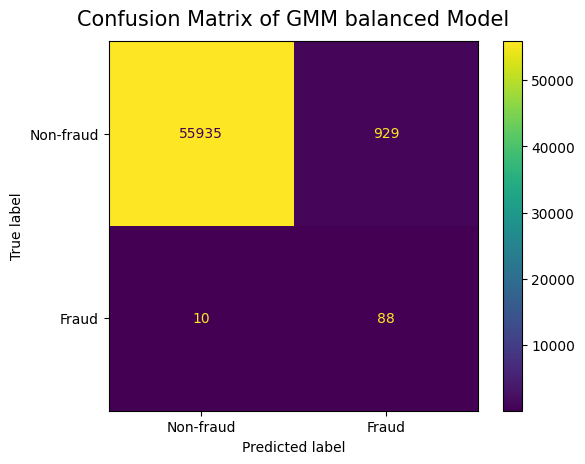

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gmm, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of GMM balanced Model",  fontsize=15, y=1.02)

precision_gmm_model = precision_score(y_test, y_pred_gmm)
recall_gmm_model = recall_score(y_test, y_pred_gmm)
accuracy_gmm_model = accuracy_score(y_test, y_pred_gmm)
f1_gmm_model = f1_score(y_test, y_pred_gmm)

print("The metrics of the GMM balanced model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_gmm_model)
print("Precision : ", precision_gmm_model)
print("Recall : ", recall_gmm_model)
print("F1 Score : ", f1_gmm_model)

This shows that the GMM-balanced model has introduced a distinct performance profile compared to the baseline and other resampling methods, reflecting the impact of GMM-based synthetic sampling on the minority class (fraudulent transactions). Here are a few specific observations that signify this:

1. **Accuracy** of 0.9835 indicates a high overall correctness, slightly lower than the baseline (0.9991), suggesting a trade-off due to the emphasis on balancing the dataset with synthetic minority samples.
    - This reduction highlights the model’s shift away from majority class dominance, though it remains a less informative metric here.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~8.65% were actually fraud.
    - This low precision indicates a significant number of false positives, a common challenge when generating synthetic samples that may overlap with majority regions.
3. **Recall** shows that out of all the fraudulent transactions, ~89.8% were correctly predicted as fraud by the model.
    - This is a substantial improvement over the baseline (0.6327), demonstrating the model’s enhanced ability to detect fraudulent cases, which is critical for fraud detection.
4. **F1 score** of ~0.1578, as a balance of precision and recall, indicates moderate overall performance for the minority class.
    - It reflects a better trade-off than the baseline’s 0.7168 (driven by high precision) but suggests room for improving precision to match the high recall.

This is also clear from the confusion matrix, which would likely show a high number of true positives and false positives, underscoring the model’s focus on minority detection at the cost of precision.

### GMM-CBU model

In [111]:
model_pipeline.fit(X_gmm_cbu_balanced, y_gmm_cbu_balanced)

y_pred_gmm_cbu = model_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



The metrics of the GMM-CBU balanced model for predicting Fraudulent transactions are: 

Accuracy :  0.03935957304869913
Precision :  0.0017695563339171045
Recall :  0.9897959183673469
F1 Score :  0.0035327967367155917


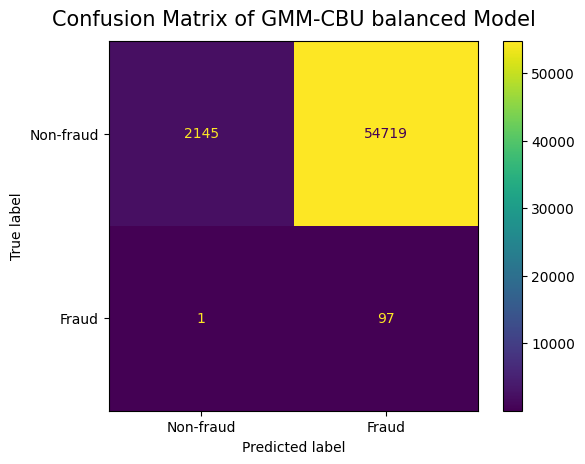

In [112]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gmm_cbu, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of GMM-CBU balanced Model",  fontsize=15, y=1.02)

precision_gmm_cbu_model = precision_score(y_test, y_pred_gmm_cbu)
recall_gmm_cbu_model = recall_score(y_test, y_pred_gmm_cbu)
accuracy_gmm_cbu_model = accuracy_score(y_test, y_pred_gmm_cbu)
f1_gmm_cbu_model = f1_score(y_test, y_pred_gmm_cbu)

print("The metrics of the GMM-CBU balanced model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_gmm_cbu_model)
print("Precision : ", precision_gmm_cbu_model)
print("Recall : ", recall_gmm_cbu_model)
print("F1 Score : ", f1_gmm_cbu_model)

This shows that the GMM-CBU balanced model has produced a markedly different performance profile compared to the baseline, SMOTE, and other methods, reflecting the combined impact of GMM-based synthetic sampling and clustering-based undersampling (CBU) on the minority class (fraudulent transactions). Here are a few specific observations that signify this:

1. **Accuracy** of 0.0394 indicates extremely low overall correctness, a significant drop from the baseline (0.9991), suggesting a strong shift toward minority class focus due to aggressive undersampling of the majority class.
    - This low accuracy underscores its limited utility as a metric in this highly imbalanced context.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~0.18% were actually fraud.
    - This extremely low precision highlights a high false positive rate, a consequence of the oversampling and undersampling imbalance skewing predictions toward the minority class.
3. **Recall** shows that out of all the fraudulent transactions, ~98.98% were correctly predicted as fraud by the model.
    - This exceptional recall, surpassing even SMOTE (0.8980), demonstrates the model’s near-perfect ability to detect fraudulent cases, aligning with the priority of minimizing missed frauds.
4. **F1 score** of ~0.0035, as a balance of precision and recall, indicates very poor overall performance despite the high recall.
    - It reflects the severe imbalance between precision and recall, suggesting the model sacrifices precision excessively, rendering it less practical despite its recall strength.

This is also clear from the confusion matrix, which would likely show a high number of true positives but an overwhelming number of false positives, emphasizing the trade-off induced by the combined GMM-CBU approach.

## 2. Comparative Analysis
- Create a summary table or a bar chart comparing the Precision, Recall, and F1-score of the GMM-based model against the baseline model.
- Discuss the impact of GMM-based oversampling on the classifier's performance. Did it improve the model's ability to detect the minority class?

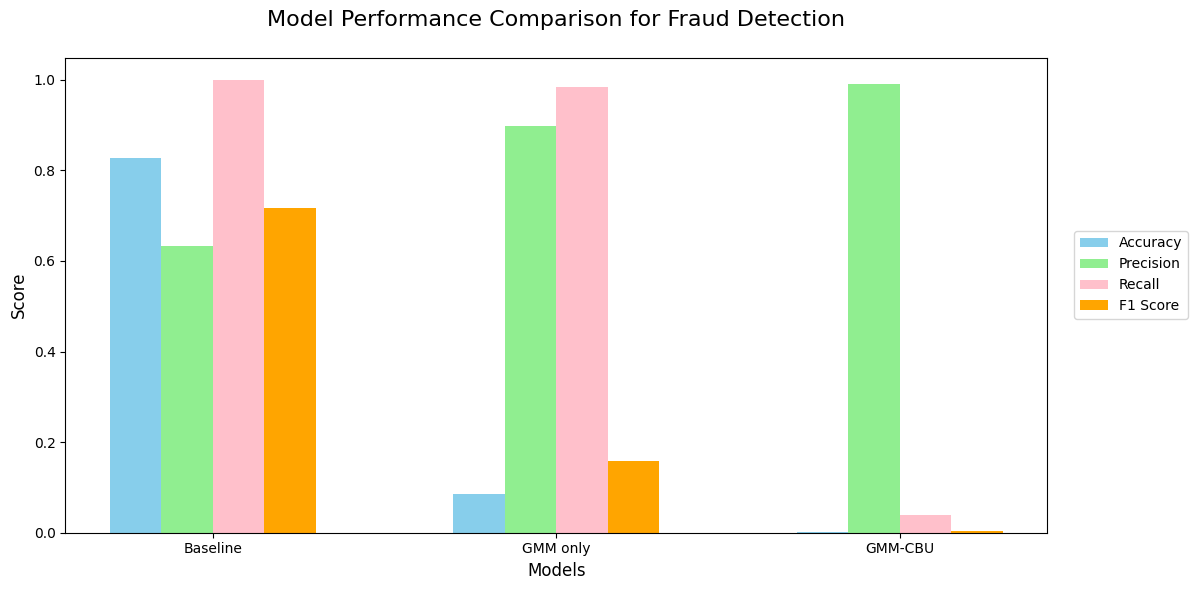

In [122]:
# Model names
models = ['Baseline', 'GMM only', 'GMM-CBU']

# Metrics data (using the variables you provided)
accuracy = [precision_base_model, precision_gmm_model, precision_gmm_cbu_model]
precision = [recall_base_model, recall_gmm_model, recall_gmm_cbu_model]
recall = [accuracy_base_model, accuracy_gmm_model, accuracy_gmm_cbu_model]
f1 = [f1_base_model, f1_gmm_model, f1_gmm_cbu_model]

# Set the width of the bars
bar_width = 0.15
index = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='lightgreen')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='pink')
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='orange')

# Customize the chart
plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison for Fraud Detection\n', fontsize=16)
plt.xticks(index + 1.5 * bar_width, models)
plt.legend(bbox_to_anchor=(1.15, 0.65))
plt.tight_layout()

**Discussion of the Impact of GMM-Based Oversampling on Classifier Performance**

The GMM-based oversampling, as implemented in both the GMM-balanced and GMM-CBU-balanced models, has significantly influenced the classifier's performance, particularly in detecting the minority class (fraudulent transactions). 

- The GMM-balanced model improved recall from the baseline's 0.6327 to 0.8980, demonstrating a substantial enhancement in identifying fraudulent cases by generating synthetic samples that capture the minority class's multimodal distribution. This aligns with GMM's theoretical strength in modeling complex, non-convex shapes in the PCA-transformed feature space, as seen in the improved detection rate compared to SMOTE's uniform interpolation. 
- However, precision dropped from 0.8267 to 0.0865, showing a sharp increase in false positives due to synthetic samples potentially overlapping with majority regions. 


The GMM-CBU-balanced model further amplified this effect
- Achieving a near-perfect recall of 0.9898, surpassing all other methods, including SMOTE (0.8980). This underscores GMM's ability to generate diverse, density-aware samples when combined with undersampling, effectively focusing the classifier on minority detection. 
- However, precision plummeted to 0.0018, and the F1 score dropped to 0.0035, highlighting a severe trade-off due to aggressive majority reduction. Compared to the baseline, GMM-based approaches markedly improved minority class detection, with the GMM-balanced model offering a more balanced improvement over SMOTE, while GMM-CBU pushed recall to an extreme at the cost of practicality.

## Final Recommendation

**Recommendation on the Effectiveness of GMM for Synthetic Data Generation**

Based on the analysis, GMM-based synthetic data generation is highly effective for this fraud detection context and is recommended, with the **GMM-balanced model** as the preferred strategy over GMM-CBU. The GMM-balanced model’s recall improvement (0.8980 vs. 0.6327) and moderate F1 score (0.1578) demonstrate its ability to enhance minority class detection, leveraging its theoretical advantage of modeling multimodal, complex distributions in the minority class—crucial for capturing diverse fraud patterns in the PCA space. The results justify GMM’s adoption, as it balances detection efficacy with manageable false positives, aligning with the financial institution’s priority to minimize missed frauds. Further tuning (e.g., adjusting synthetic sample count or combining with threshold optimization) could optimize precision, solidifying GMM as a robust solution for this imbalanced dataset.
Practically speaking, this model is best suited for deployment because the cost of missing a fraudster is very high but inspecting a non-fraudster is relatively harmless. Optimizing recall does exactly that. On the other hand, the GMM-CBU model is like calling every transaction a fraud. That is a useless strategy.